Vamos a crear un conjunto de datos sintético para 1000 personas que represente la relación entre la altura de una persona y el tamaño de su pie, y
luego construye un modelo de regresión lineal simple para predecir el tamaño del pie basándonos en la altura. Presenta la práctica en un cuaderno de Google Collab.

A. Genera el conjunto de datos:

Variables:

Altura (cm): Altura de la persona.
Tamaño del pie (EU): Tamaño del zapato según el sistema europeo.
Suposiciones:

La relación entre altura y tamaño del pie es aproximadamente lineal.
Usaremos una distribución normal para simular la altura y el tamaño del pie con una cierta relación lineal y algo de ruido aleatorio para hacerlo más realista.
Creación de Datos:

La altura media será de 170 cm con una desviación estándar de 10 cm.
El tamaño del pie lo consideraremos entero, aumentará aproximadamente 1 tamaño de zapato por cada 10 cm de aumento en la altura.
Consideraremos un tamaño base de 38 + 1 tamaño por cada 10 cm por encima de 160 cm + ruido (entre -2 y 2). Investiga que generador aleatorio de numpy puedes usar para esto.
B. Visualiza los datos.

Haz el gráfico lo más presentable posible.

C. Divide los datos entre entrenamiento y test.

Crea la matriz de características, el objetivo y haz la división.

D. Crea el modelo.

Usa la clase LinearRegression, instancia un objeto y ajústalo a los datos.

E. Evalúa el modelo.

Usa distintas métricas.

#Generación de los datos

In [1]:
import numpy as np

np.random.seed(1)
samples = 1000

mean, sigma = 170, 10

height = np.random.normal(mean, sigma, samples)
noise = np.random.randint(-2, 2, samples)
footSize = 38 + ((height - 160)//10) + noise

print(height)
print(footSize)

[186.24345364 163.88243586 164.71828248 159.27031378 178.65407629
 146.98461303 187.44811764 162.38793099 173.19039096 167.50629625
 184.62107937 149.39859291 166.77582796 166.15945645 181.33769442
 159.00108733 168.27571792 161.22141582 170.42213747 175.82815214
 158.99380823 181.4472371  179.01590721 175.02494339 179.00855949
 163.16272141 168.77109774 160.64230566 167.3211192  175.30355467
 163.08339248 166.03246473 163.128273   161.54794359 163.28753869
 169.87335401 158.82689651 172.34415698 186.59802177 177.42044161
 168.08164448 161.12371036 162.52841706 186.92454601 170.50807755
 163.63004353 171.90915485 191.00255136 171.20158952 176.1720311
 173.0017032  166.47750154 158.57481802 166.50657278 167.91105767
 175.86623191 178.38983414 179.31102081 172.85587325 178.85141164
 162.45602059 182.52868155 175.1292982  167.01907165 174.88518147
 169.24428287 181.31629387 185.19816816 191.85575407 156.03503665
 155.55886195 164.95534137 171.60037069 178.76168921 173.15634947
 149.777987

# Visualización

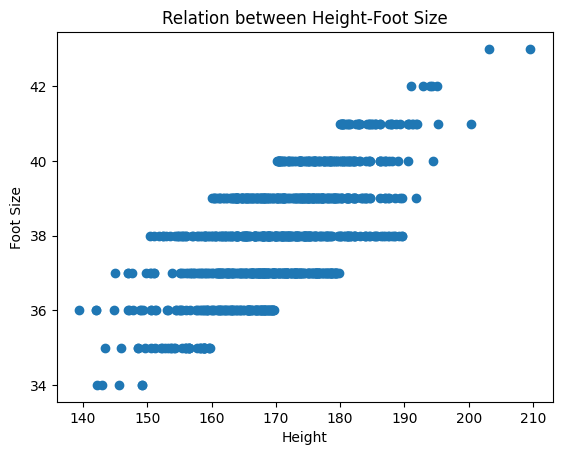

In [2]:
import matplotlib.pyplot as plt

plt.scatter(height, footSize)
plt.title('Relation between Height-Foot Size')
plt.xlabel('Height')
plt.ylabel('Foot Size')

plt.show()

# Divide los datos entre entrenamiento y test

In [3]:
from sklearn.model_selection import train_test_split

height_train = height[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(height_train, footSize, test_size=0.2)

#Crea el modelo

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evalúa el modelo

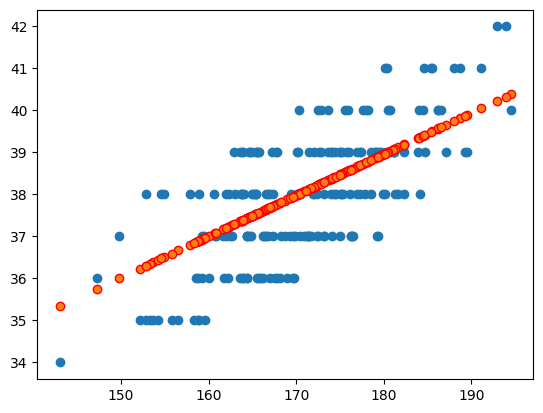

In [8]:
y_pred = model.predict(X_test)

fig = plt.figure()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, edgecolor = 'red')

In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("Rendimiento del Modelo")
print("--------------------------------------")
print(f'MAE = {mae}')
print(f'MSE = {mse}')
print(f'R2 =  {r2}')